# Introduction
- In this Project, we are going to build a machine learning project based on its problem statement.
- Before starting with the project let's understand what all we do in machine learning lifecycle.

## Machine Learning Lifecycle
- Understandig Problem Statement
- Data Collection
- Data Cleaning
- Exploratory Data Analysis (EDA)
- Splitting into Training and Test data
- Model Building
- Evaluation of Model
- Hypertuning
- Saving the model
- Deployment

# Machine Learning Algorithm 
- Which model to select is a very tricky question in Machine Learning Lifecycle, as we have various of Machine learning
algorithm that has its own advantages and disadvantages.
- In this project, we will use only two machine learning model Linear regression and Random Forest regressor.
- This two model are very different to each other but gives a very good result on regression problem.

In [1]:
## Importing Basic python libraries.
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Loading the data
dataset=pd.read_excel(r"E:\Data science materials\Real_world_projects\flight_price_prediction\Data_Train.xlsx")

In [3]:
# make a copy of your data
data=dataset.copy()

In [4]:
# to see the first five rows of the columns
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,Null,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,Null,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,Null,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,Null,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,Null,13302


In [5]:
# Total columns data have
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [6]:
# To get some information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [7]:
# To more in details about the data
data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


## Now we do prediction using machine learning which leads to below takeaways:
- Data Cleaning
- Exploratory Data Analysis
- Data Visualisation
- Feature Engineering

## Data Cleaning
- In this step, we will try to clean our data i.e. we will check for the null values , If there is any null value we will 
try to remove it from our data.
- Then, we will check for the duplicates data , any exists we can remove that also.

In [8]:
# we will check the null values of the data
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

<AxesSubplot:>

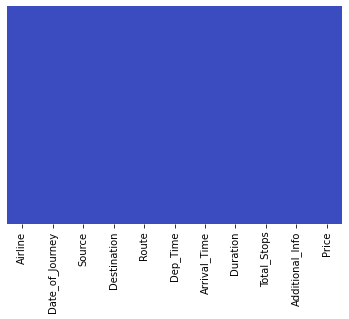

In [9]:
# Visualisation for the null values belong to the dataset
sns.heatmap(data.isnull(),cmap='coolwarm',yticklabels=False,cbar=False)

In [10]:
# We have only few missing values , so we can drop the missing values
data.dropna(inplace=True)

In [11]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

Now , there is no missing values in our data

In [12]:
# Now , we will check for the duplicates data present in our data set
data[data.duplicated()].head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
683,Jet Airways,1/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,04:25 02 Jun,13h 50m,2 stops,Null,13376
1061,Air India,21/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,22:00,19:15 22 May,21h 15m,2 stops,Null,10231
1348,Air India,18/05/2019,Delhi,Cochin,DEL → HYD → BOM → COK,17:15,19:15 19 May,26h,2 stops,Null,12392
1418,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 07 Jun,22h 55m,2 stops,In-flight meal not included,10368
1674,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,18:25,21:20,2h 55m,non-stop,Null,7303


In [13]:
# We have to drop the duplicate data
data.drop_duplicates(keep='first',inplace=True)

In [14]:
data[data.duplicated()].head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price


In [15]:
# To get the count of rows and columns
data.shape

(10462, 11)

# EDA (Exploratory Data Analysis)
- In this section of the project , we will learn more about the data.
- What each column data is saying.

we looking the data.info , we got to know that our Date_of_journey column is a object, so will try to convert into a data column , so that we can use this column in our prediction.

In [16]:
data['Journey_Day']=pd.to_datetime(data.Date_of_Journey,format='%d/%m/%Y').dt.day

In [17]:
data['Journey_month']=pd.to_datetime(data.Date_of_Journey,format='%d/%m/%Y').dt.month

In [18]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,Null,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,Null,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,Null,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,Null,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,Null,13302,1,3


In [19]:
# Now  , we can drop the Date_of_Journey column
data=data.drop(['Date_of_Journey'],axis=1)

In [20]:
# Dep_Time is the column which shows the departure time of the flight.
# similarly we can extract hour and minutes from dep_Time column and later drop this column too.

data['Dep_hr']=pd.to_datetime(data['Dep_Time']).dt.hour
data['Dep_min']=pd.to_datetime(data['Dep_Time']).dt.minute
data=data.drop(['Dep_Time'],axis=1)

In [21]:
data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_month,Dep_hr,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,Null,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,Null,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,Null,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,Null,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,Null,13302,1,3,16,50


In [22]:
# Arrival time, when flights arrive.
# Now, we will extract day, hour and minutes from Arrival column
data['Arrival_hour']=pd.to_datetime(data['Arrival_Time']).dt.hour
data['Arrival_min']=pd.to_datetime(data['Arrival_Time']).dt.minute
data=data.drop(['Arrival_Time'],axis=1)

In [23]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_month,Dep_hr,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,Null,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,Null,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,Null,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,Null,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,Null,13302,1,3,16,50,21,35


In [24]:
# we will create one more column to convert Duration column into duration in minutes.
data['duration_mins']=data['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [25]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_month,Dep_hr,Dep_min,Arrival_hour,Arrival_min,duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,Null,3897,24,3,22,20,1,10,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,Null,7662,1,5,5,50,13,15,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,Null,13882,9,6,9,25,4,25,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,Null,6218,12,5,18,5,23,30,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,Null,13302,1,3,16,50,21,35,285


In [26]:
# now we will drop the Duration column
data=data.drop(['Duration'],axis=1)

In [27]:
data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_month,Dep_hr,Dep_min,Arrival_hour,Arrival_min,duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,Null,3897,24,3,22,20,1,10,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,Null,7662,1,5,5,50,13,15,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,Null,13882,9,6,9,25,4,25,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,Null,6218,12,5,18,5,23,30,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,Null,13302,1,3,16,50,21,35,285


## Data visulaisation

In [28]:
data['Airline'].value_counts()

Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

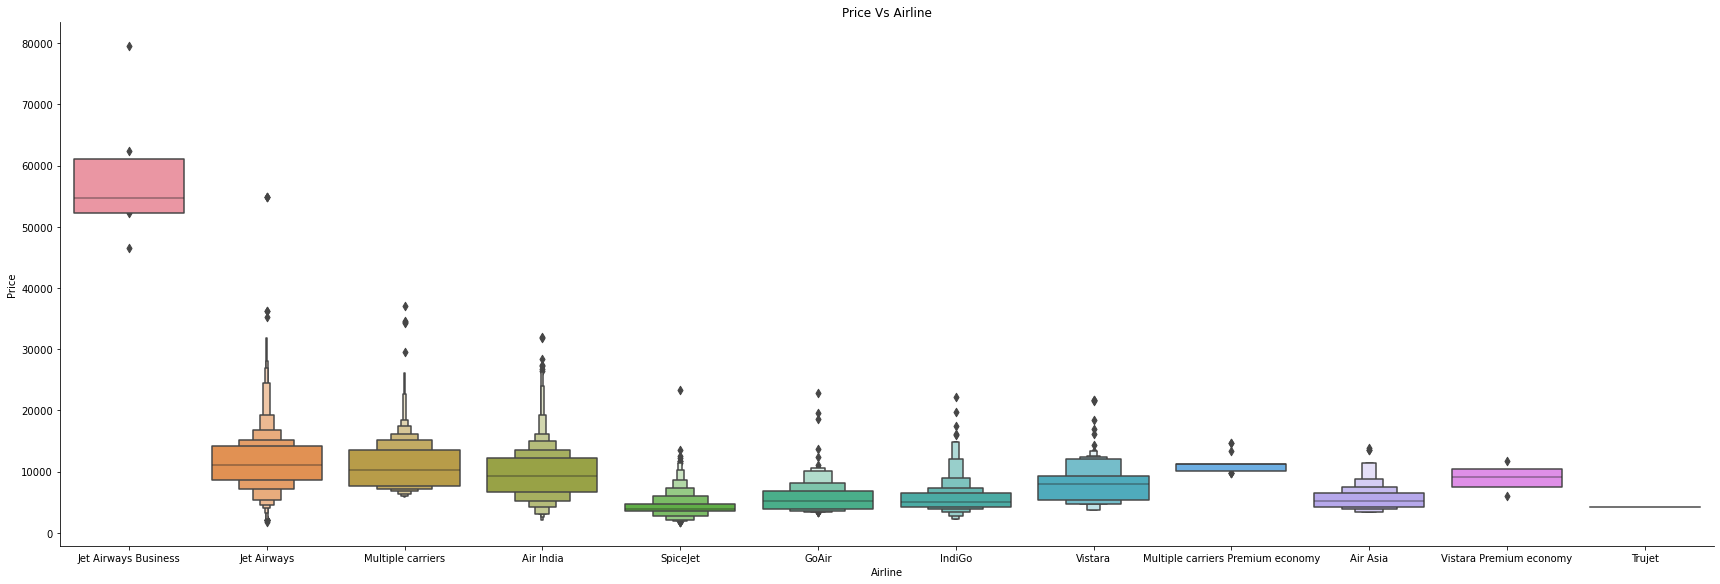

In [29]:
# Price vs Airline
sns.catplot(y = "Price", x = "Airline", data = data.sort_values("Price", ascending = False), kind="boxen", height = 8, aspect = 3)
plt.title("Price Vs Airline")
plt.show()
# we can clearly see 'Jet Airways Business '  has highest price range but Not many people use prefer this.

In [30]:
# Let's see How many sources of flight are there in our datasets
data['Source'].value_counts()

Delhi       4345
Kolkata     2860
Banglore    2179
Mumbai       697
Chennai      381
Name: Source, dtype: int64

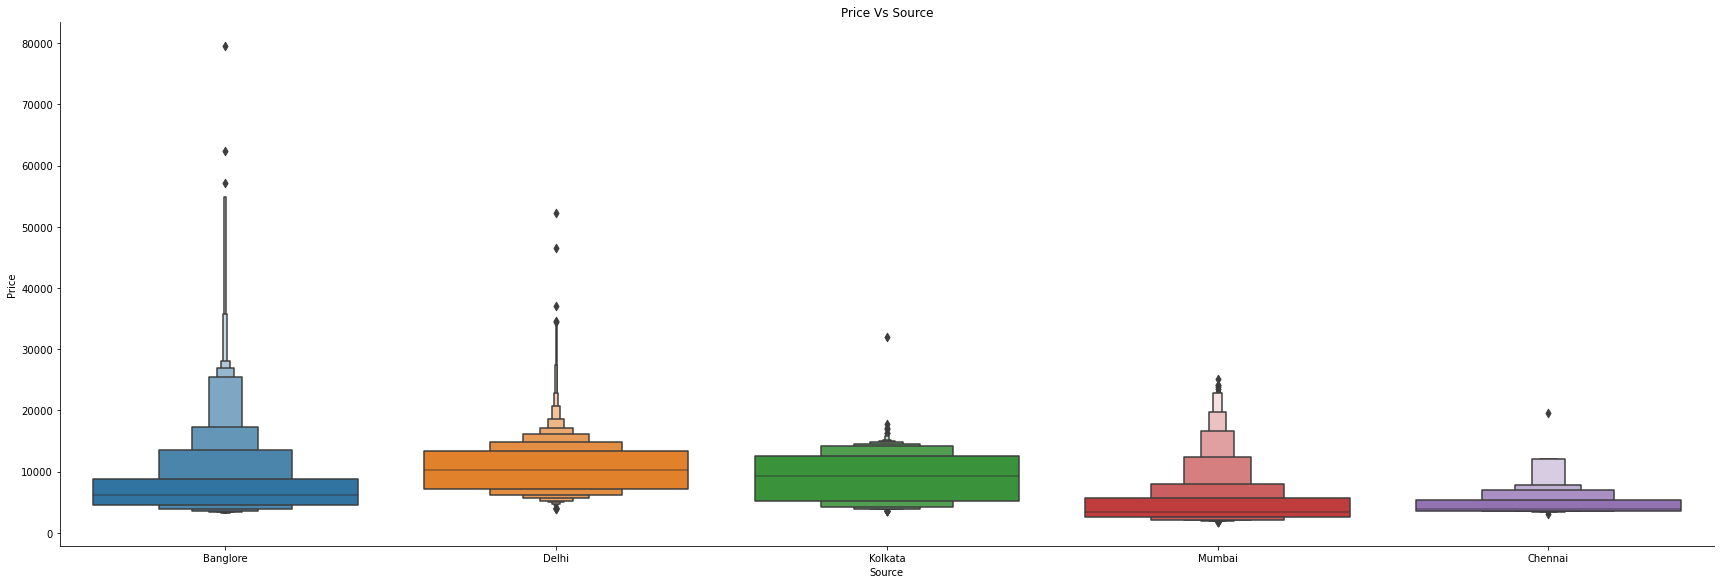

In [31]:
# Price vs Source
sns.catplot(y = "Price", x = "Source", data = data.sort_values("Price", ascending = False), kind="boxen", height = 8, aspect = 3)
plt.title("Price Vs Source")
plt.show()

# with this visualisation, we can clearly see Bangalore has the most outliers in terms of Price.

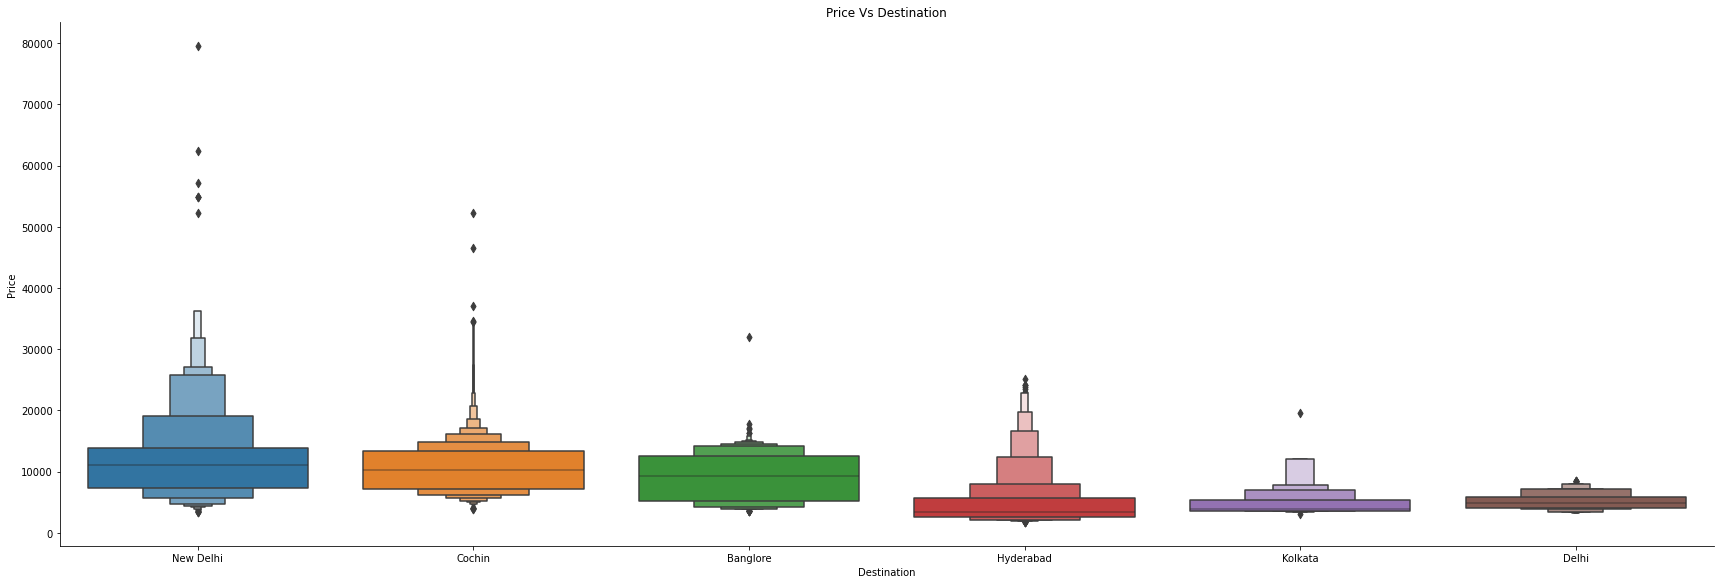

In [32]:
# Price vs Source
sns.catplot(y = "Price", x = "Destination", data = data.sort_values("Price", ascending = False), kind="boxen", height = 8, aspect = 3)
plt.title("Price Vs Destination")
plt.show()

# Here, we can see New Delhi has the most outliers in terms of Price.

## Plotting Bar charts for Months and No.of Flights

In [33]:
data['Journey_month'].value_counts()

5    3395
6    3311
3    2678
4    1078
Name: Journey_month, dtype: int64

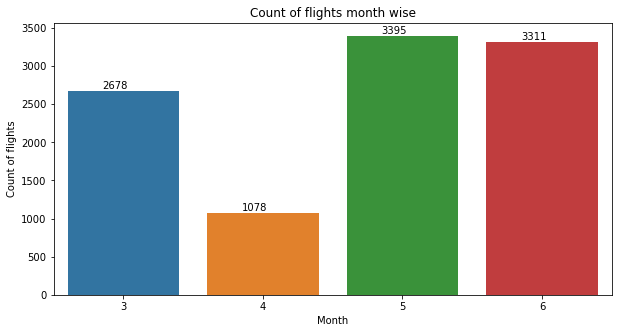

In [34]:
plt.figure(figsize = (10, 5))
plt.title('Count of flights month wise')
ax=sns.countplot(x = 'Journey_month', data = data)
plt.xlabel('Month')
plt.ylabel('Count of flights')
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom', color= 'black')
    
    
# We can see May month has most number of flights i.e 3395

## Plotting Bar chart for Types of Airline vs Number of Flights

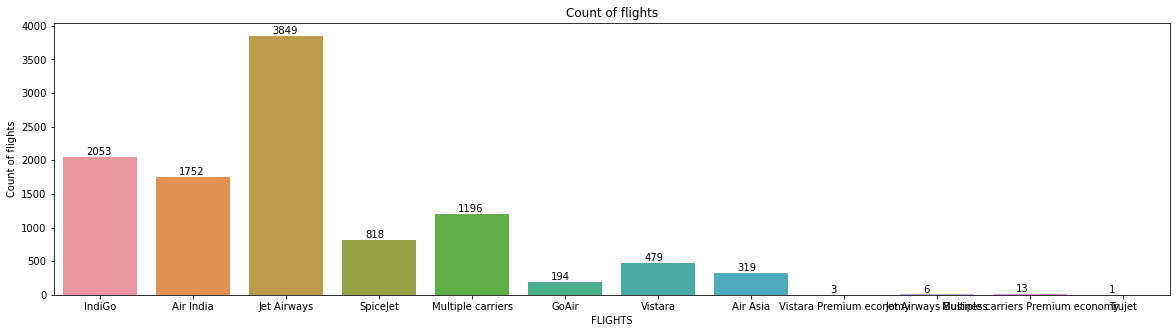

In [4]:
plt.figure(figsize = (20, 5))
plt.title('Count of flights')
ax=sns.countplot(x = 'Airline', data = data)
plt.xlabel('FLIGHTS')
plt.ylabel('Count of flights')
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom', color= 'black')
    
# Here , we can see Jet Airways has most number of the flights.

In [36]:
# Handling Categoriacal columns
data.info()

# we can clearly see that our most of the column are categorical, so before applying model we need to convert into int col.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10462 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10462 non-null  object
 1   Source           10462 non-null  object
 2   Destination      10462 non-null  object
 3   Route            10462 non-null  object
 4   Total_Stops      10462 non-null  object
 5   Additional_Info  10462 non-null  object
 6   Price            10462 non-null  int64 
 7   Journey_Day      10462 non-null  int64 
 8   Journey_month    10462 non-null  int64 
 9   Dep_hr           10462 non-null  int64 
 10  Dep_min          10462 non-null  int64 
 11  Arrival_hour     10462 non-null  int64 
 12  Arrival_min      10462 non-null  int64 
 13  duration_mins    10462 non-null  int64 
dtypes: int64(8), object(6)
memory usage: 1.2+ MB


In [37]:
# Airline

Airline=pd.get_dummies(data['Airline'],drop_first=True)
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [38]:
# Source

Source=pd.get_dummies(data['Source'],drop_first=True)
Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [39]:
# Destination

Destination=pd.get_dummies(data['Destination'],drop_first=True)
Destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [40]:
# Routes
data['Route'].value_counts()

# Route and total_stop , somehow is related to each other , so better we drop this column.

DEL → BOM → COK          2376
BLR → DEL                1536
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → VTZ → BLR             1
CCU → IXZ → MAA → BLR       1
BOM → COK → MAA → HYD       1
BOM → CCU → HYD             1
BOM → BBI → HYD             1
Name: Route, Length: 128, dtype: int64

In [41]:
# Additional_Info 
data['Additional_Info'].value_counts()/len(data)*100

# we can see there are 78% null in the 'Additional Info ' col, so it's better to drop this column.

Null                            78.225961
In-flight meal not included     18.409482
No check-in baggage included     3.039572
1 Long layover                   0.181610
Change airports                  0.066909
Business class                   0.038234
Null                             0.009558
1 Short layover                  0.009558
Red-eye flight                   0.009558
2 Long layover                   0.009558
Name: Additional_Info, dtype: float64

In [42]:
# Dropping the Route and Additional Info column
data=data.drop(['Route','Additional_Info'],axis=1)

In [43]:
# Total_stops

data['Total_Stops'].value_counts()

1 stop      5625
non-stop    3475
2 stops     1318
3 stops       43
4 stops        1
Name: Total_Stops, dtype: int64

In [44]:
# we can convert this column by using Label Encoder
data.replace({'1 stop':1,'non-stop':0,'2 stops':2,'3 stops':3,'4 stops':4},inplace=True)
data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_month,Dep_hr,Dep_min,Arrival_hour,Arrival_min,duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,170
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,445
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,1140
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,325
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,285


In [45]:
# Now we can concatenate the "Airline","Source"."Destination" with our data
data=pd.concat([Airline,Source,Destination,data],axis=1)
data.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,...,Destination,Total_Stops,Price,Journey_Day,Journey_month,Dep_hr,Dep_min,Arrival_hour,Arrival_min,duration_mins
0,0,0,1,0,0,0,0,0,0,0,...,New Delhi,0,3897,24,3,22,20,1,10,170
1,1,0,0,0,0,0,0,0,0,0,...,Banglore,2,7662,1,5,5,50,13,15,445
2,0,0,0,1,0,0,0,0,0,0,...,Cochin,2,13882,9,6,9,25,4,25,1140
3,0,0,1,0,0,0,0,0,0,0,...,Banglore,1,6218,12,5,18,5,23,30,325
4,0,0,1,0,0,0,0,0,0,0,...,New Delhi,1,13302,1,3,16,50,21,35,285


In [46]:
# Dropping the 'Airline','Source' and "Destination" column from our dataset
data=data.drop(['Airline','Source','Destination' ],axis=1)
data.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,...,New Delhi,Total_Stops,Price,Journey_Day,Journey_month,Dep_hr,Dep_min,Arrival_hour,Arrival_min,duration_mins
0,0,0,1,0,0,0,0,0,0,0,...,1,0,3897,24,3,22,20,1,10,170
1,1,0,0,0,0,0,0,0,0,0,...,0,2,7662,1,5,5,50,13,15,445
2,0,0,0,1,0,0,0,0,0,0,...,0,2,13882,9,6,9,25,4,25,1140
3,0,0,1,0,0,0,0,0,0,0,...,0,1,6218,12,5,18,5,23,30,325
4,0,0,1,0,0,0,0,0,0,0,...,1,1,13302,1,3,16,50,21,35,285


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10462 entries, 0 to 10682
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Air India                          10462 non-null  uint8
 1   GoAir                              10462 non-null  uint8
 2   IndiGo                             10462 non-null  uint8
 3   Jet Airways                        10462 non-null  uint8
 4   Jet Airways Business               10462 non-null  uint8
 5   Multiple carriers                  10462 non-null  uint8
 6   Multiple carriers Premium economy  10462 non-null  uint8
 7   SpiceJet                           10462 non-null  uint8
 8   Trujet                             10462 non-null  uint8
 9   Vistara                            10462 non-null  uint8
 10  Vistara Premium economy            10462 non-null  uint8
 11  Chennai                            10462 non-null  uint8
 12  Delhi             

# Feature Engineering

In [48]:
data.corr()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,...,New Delhi,Total_Stops,Price,Journey_Day,Journey_month,Dep_hr,Dep_min,Arrival_hour,Arrival_min,duration_mins
Air India,1.000000,-0.060418,-0.216526,-0.325139,-0.010529,-0.157916,-0.015504,-0.127758,-0.004298,-0.096176,...,0.056059,0.272543,0.050357,-0.031830,-0.045780,-0.020731,-0.043883,0.083394,0.064743,0.260855
GoAir,-0.060418,1.000000,-0.067711,-0.101677,-0.003293,-0.049383,-0.004848,-0.039952,-0.001344,-0.030076,...,0.017694,-0.057547,-0.094093,-0.002415,-0.003707,-0.016309,0.077403,0.017962,0.097252,-0.090820
IndiGo,-0.216526,-0.067711,1.000000,-0.364391,-0.011800,-0.176980,-0.017376,-0.143181,-0.004816,-0.107787,...,-0.026885,-0.294993,-0.357725,0.009730,-0.042712,-0.022254,-0.014346,-0.075624,0.034447,-0.338287
Jet Airways,-0.325139,-0.101677,-0.364391,1.000000,-0.017720,-0.265756,-0.026091,-0.215004,-0.007232,-0.161855,...,0.066380,0.197439,0.411430,-0.023679,0.049903,0.120596,0.022596,-0.015703,-0.058805,0.297017
Jet Airways Business,-0.010529,-0.003293,-0.011800,-0.017720,1.000000,-0.008606,-0.000845,-0.006963,-0.000234,-0.005241,...,0.049146,0.019256,0.255531,-0.031960,-0.035024,-0.007579,0.009245,-0.014750,0.005224,-0.011632
Multiple carriers,-0.157916,-0.049383,-0.176980,-0.265756,-0.008606,1.000000,-0.012672,-0.104424,-0.003513,-0.078611,...,-0.111157,0.134335,0.145730,0.044667,0.056534,-0.151549,-0.110297,0.066751,-0.169417,-0.002879
Multiple carriers Premium economy,-0.015504,-0.004848,-0.017376,-0.026091,-0.000845,-0.012672,1.000000,-0.010252,-0.000345,-0.007718,...,-0.010913,0.010555,0.018244,0.031397,-0.051571,-0.029004,-0.004653,0.013441,-0.001860,-0.001637
SpiceJet,-0.127758,-0.039952,-0.143181,-0.215004,-0.006963,-0.104424,-0.010252,1.000000,-0.002842,-0.063598,...,-0.038145,-0.273128,-0.294826,0.023608,-0.008800,-0.010460,0.093068,-0.093641,0.012123,-0.261975
Trujet,-0.004298,-0.001344,-0.004816,-0.007232,-0.000234,-0.003513,-0.000345,-0.002842,1.000000,-0.002139,...,-0.003025,0.002926,-0.010331,-0.008618,-0.014295,0.000890,-0.010084,0.003726,-0.002785,-0.008490
Vistara,-0.096176,-0.030076,-0.107787,-0.161855,-0.005241,-0.078611,-0.007718,-0.063598,-0.002139,1.000000,...,0.018222,-0.116775,-0.057980,-0.012727,-0.015464,0.024881,-0.078720,0.068423,0.070001,-0.013308


## Correlation Matrix wit Heatmap

-  correlation tells how the features are related to the other features and to the dependent feature.
- Correlation can be positive means directly proportional to each other or it can be a neative correlation means
  indirectly proportional.

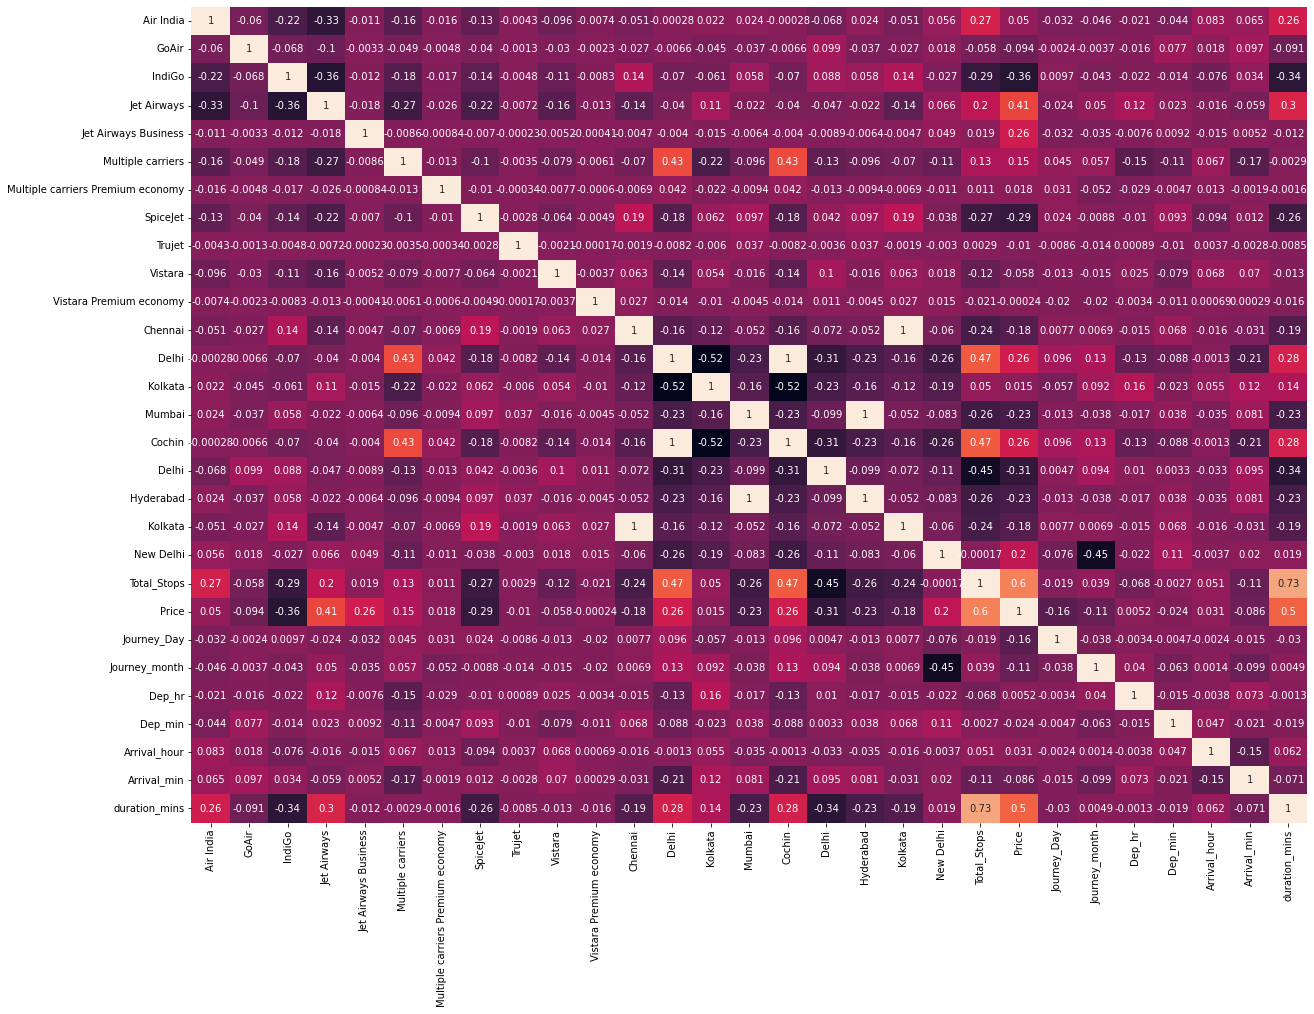

In [49]:
# visualization for correaltion
plt.figure(figsize=(20,15))
sns.heatmap(data.corr(),annot=True,cbar=False)
plt.show()

## feature importance 
- it gives you the score for each feature of data
- The higher the score --- the more important feature is.

In [50]:
## Splitting independent and dependent features
X=data.drop(['Price'],axis=1)
y=data['Price']

In [51]:
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [52]:
model.feature_importances_

array([1.15279828e-02, 1.85688022e-03, 1.12587889e-02, 1.35631127e-01,
       6.90610824e-02, 2.17885914e-02, 8.75220669e-04, 2.31235800e-03,
       9.08900184e-05, 5.21841188e-03, 5.20926638e-05, 5.16753421e-04,
       8.38112782e-03, 3.35325089e-03, 7.24366485e-03, 1.26295848e-02,
       1.66734571e-02, 7.55291042e-03, 4.10287225e-04, 2.53540110e-02,
       2.22747367e-01, 1.44795581e-01, 5.33676400e-02, 2.63423049e-02,
       2.59025842e-02, 2.95463642e-02, 2.27001012e-02, 1.32809584e-01])

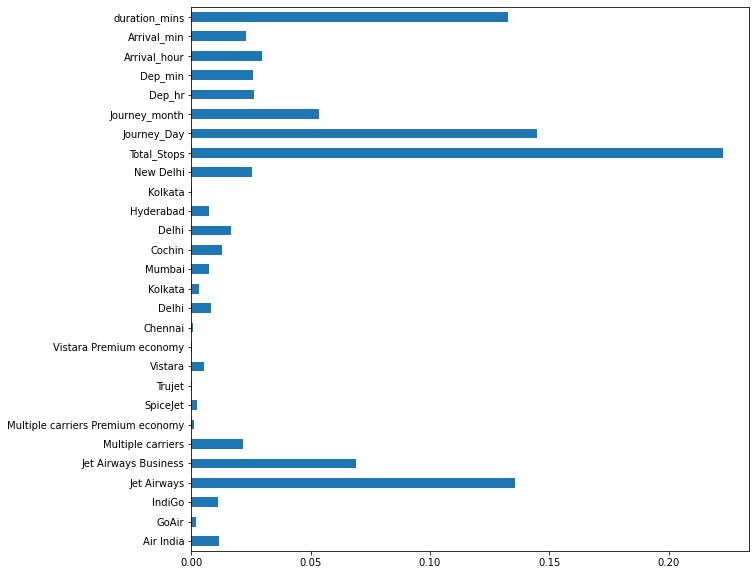

In [53]:
# plot the graph of important features for better visualization
plt.figure(figsize=(10,10))
feature_importance=pd.Series(model.feature_importances_,index=X.columns)
feature_importance.plot(kind='barh')
plt.show()

<AxesSubplot:xlabel='Price', ylabel='Density'>

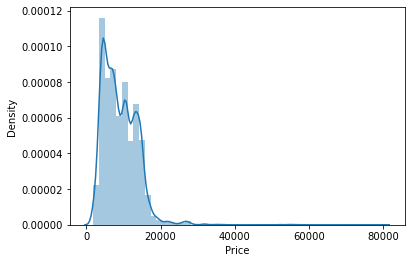

In [54]:
sns.distplot(y)

## Train-Test split

In [55]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(7323, 28)
(3139, 28)
(7323,)
(3139,)


## Linear Regression Model

In [56]:
from sklearn.linear_model import LinearRegression
lr_model=LinearRegression()
lr_model.fit(x_train,y_train)

LinearRegression()

In [57]:
print("The coeffients of Linear Regression model are:",lr_model.coef_)
print("The intercept of Linear Regression model is:",lr_model.intercept_)

The coeffients of Linear Regression model are: [ 1.52788759e+03  1.58228140e+02  2.75769601e+02  4.41427476e+03
  4.75613972e+04  3.60949206e+03  3.94437318e+03 -2.43076007e+02
 -2.69573529e+03  2.19417082e+03  2.90611866e+03  6.00851425e+01
  6.29515764e+01 -2.80063594e+01 -8.15474538e+02  6.29515764e+01
 -9.29194814e+02 -8.15474538e+02  6.00851425e+01  1.64963899e+03
  2.73670125e+03 -7.86676732e+01 -4.08973934e+02  2.32075394e+01
 -2.31774393e+00 -7.88364957e+00  2.40514189e+00  8.92586079e-02]
The intercept of Linear Regression model is: 7199.431786539181


In [58]:
coef_df=pd.DataFrame(lr_model.coef_,index=X.columns,columns=['Coefficients'])
coef_df

,Coefficients
Air India,1527.887589
GoAir,158.228140
IndiGo,275.769601
Jet Airways,4414.274760
Jet Airways Business,47561.397168
Multiple carriers,3609.492061
Multiple carriers Premium economy,3944.373178
SpiceJet,-243.076007
Trujet,-2695.735288
Vistara,2194.170821


In [59]:
print("The R^2 score for training dataset:",lr_model.score(x_train,y_train))

The R^2 score for training dataset: 0.6367799086465608


In [60]:
print("The R^2 score for test dataset:",lr_model.score(x_test,y_test))

The R^2 score for test dataset: 0.588547787456958


## Cross validation

In [61]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(lr_model,x_train,y_train,cv=10)

In [62]:
print(score.mean())

0.6312401656727241


In [63]:
# checking the assumption
y_prediction=lr_model.predict(x_test)

<AxesSubplot:xlabel='Price', ylabel='Density'>

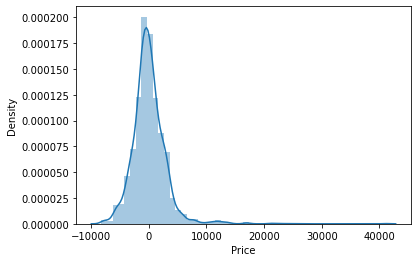

In [64]:
sns.distplot(y_test-y_prediction)

## Regression Evaluation Metrics
Here are three common evaluation metrics for regression problems:

Mean Absolute Error (MAE) is the mean of the absolute value of the errors:

 
Mean Squared Error (MSE) is the mean of the squared errors:

 
Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:

 
Comparing these metrics:

- MAE is the easiest to understand, because it's the average error.
- MSE is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units.
All of these are loss functions, because we want to minimize them.

In [65]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_prediction))
print('MSE:', metrics.mean_squared_error(y_test, y_prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_prediction)))

MAE: 1989.47584045156
MSE: 8584809.071996346
RMSE: 2929.98448323474


In [74]:
metrics.r2_score(y_test, y_prediction)

0.588547787456958

## Save the model

In [104]:
import pickle

# open a file where you want to store your model
file=open('lr_model_flight_price.pkl','wb')

# now dump your model into that file
pickle.dump(lr_model,file)

# RandomForest Regressor

In [66]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg.fit(x_train, y_train)

RandomForestRegressor()

In [67]:
y_pred = rf_reg.predict(x_test)

In [68]:
print("The R^2 score for training dataset:",rf_reg.score(x_train,y_train))

The R^2 score for training dataset: 0.9564684903794048


In [69]:
print("The R^2 score for test dataset:",rf_reg.score(x_test,y_test))

The R^2 score for test dataset: 0.8025850514914483


<AxesSubplot:xlabel='Price', ylabel='Density'>

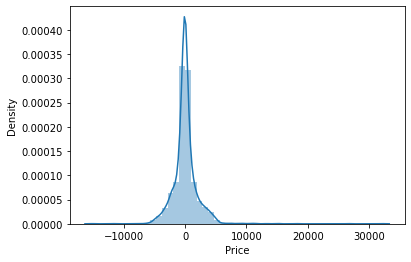

In [70]:
sns.distplot(y_test-y_pred)

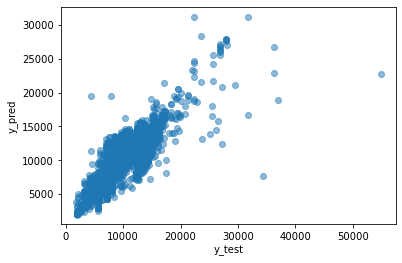

In [71]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [72]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1187.102005645703
MSE: 4118995.084335866
RMSE: 2029.5307547154505


In [73]:
metrics.r2_score(y_test, y_pred)

0.8025850514914483

# Hyperparameter Tuning

- choose following method for hyperparameter tuning
- RandomizedSearchCV - fast
- GridSearchCV
- Assign hyperparameter in the form of dictionary
- fit the model
- check best parameter and best scores

In [75]:
from sklearn.model_selection import RandomizedSearchCV

In [76]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [77]:
 #Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]
# Method of selecting samples for training each tree
# bootstrap = [True, False]

In [78]:

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [79]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

In [80]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = 1)


In [81]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   2.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   2.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   2.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   2.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   2.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   6.7s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   7.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_es

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=900; total time=   9.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=900; total time=   9.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=200; total time=   1.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=200; total time=   1.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=200; total time=   1.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=200; total time=   1.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=200; total time=   1.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   1.5s
[CV] END max_depth=10, max_features

[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=300; total time=   5.8s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=300; total time=   5.9s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=300; total time=   5.9s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=300; total time=   5.9s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   1.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   1.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   1.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   1.0s
[CV] END max_depth=20, max_featu

[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=600; total time=   5.7s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=900; total time=  25.5s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=900; total time=  25.4s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=900; total time=  25.7s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=900; total time=  25.5s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=900; total time=  25.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   1.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   1.6s
[CV] END max_depth=15, max_feature

[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=400; total time=   4.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=400; total time=   3.9s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=400; total time=   3.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=1200; total time=   9.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=1200; total time=   8.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=1200; total time=   8.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=1200; total time=   8.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=1200; total time=   8.2s
[CV] END max_depth=10, max_

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=500; total time=   3.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=500; total time=   3.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=500; total time=   3.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=500; total time=   3.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=500; total time=   3.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=600; total time=   4.4s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=600; total time=   4.4s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=600; total time=   4.4s
[CV] END max_depth=30,

[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=   7.8s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=   7.9s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1200; total time=  34.3s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1200; total time=  34.3s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1200; total time=  34.6s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1200; total time=  34.4s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1200; total time=  34.7s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=200; total time=   0.9s
[CV] END max_depth=5, max_fe

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=1100; total time=   7.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=1100; total time=   7.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=1100; total time=   7.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=1100; total time=   7.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   6.6s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   6.6s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   6.6s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   6.6s
[CV] END max_depth=10, m

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [82]:
rf_random.best_params_

{'n_estimators': 500,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [87]:
rf_random.best_score_

-3867522.155599316

In [85]:
rf_model=RandomForestRegressor(n_estimators=500,min_samples_split=10,min_samples_leaf=1,max_features='auto',max_depth=20)

In [86]:
rf_model.fit(x_train,y_train)

RandomForestRegressor(max_depth=20, max_features='auto', min_samples_split=10,
                      n_estimators=500)

In [88]:
y_predict=rf_model.predict(x_test)

In [89]:
print("The R^2 score for training dataset:",rf_model.score(x_train,y_train))

The R^2 score for training dataset: 0.9147644476401898


In [90]:
print("The R^2 score for training dataset:",rf_model.score(x_test,y_test))

The R^2 score for training dataset: 0.8121199642184287


<AxesSubplot:xlabel='Price', ylabel='Density'>

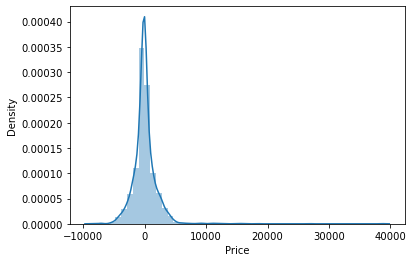

In [91]:
sns.distplot(y_test-y_predict)

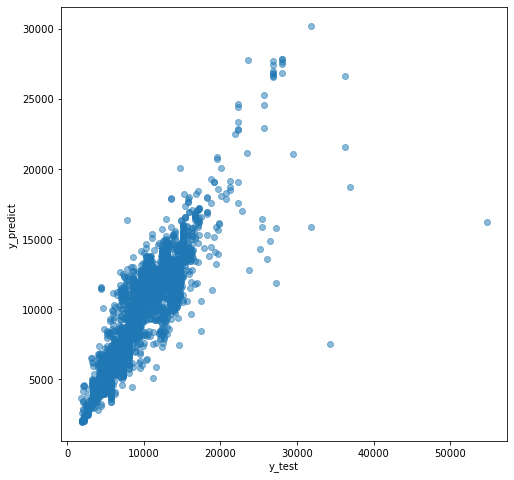

In [93]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, y_predict, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_predict")
plt.show()

In [94]:
print('MAE:', metrics.mean_absolute_error(y_test, y_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

MAE: 1159.0048059537398
MSE: 3920052.4057357092
RMSE: 1979.91222172492


## save the model

In [96]:
import pickle
# open a file where you want to store your model
file=open('rf_reg_flight_price.pkl','wb')

# now dump your model into that file
pickle.dump(rf_model,file)

# Coclusion

- We performed all the required task of machine learning lifeclycle.
- We applied two model i.e. Linear Regressor and Random Forest Regressor.
- After evaluating and comparing the performance of both model, we got to know that RandomForestRegressor gives best result.
- So, we will deploy our model with RandomforestRegressor.